In [1]:
"""
CONFIGURATION:

In this cell we can choose the database we want to use.
We can also use this cell for more general configurations and imports.
"""

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import database
import copy

db = database.db_connect(dbname="guest", user="guest")
db.set_client_encoding('UTF8')

In [2]:
"""
HELP:

Prints functions currently available in database.py.
"""
database.help()

   database.db_connect(dbname, user)
   database.db_query(db, query)
   database.db_print(result)
   database.get_centroid(db)
   database.get_taxi_stands(db)
   database.get_taxi_services(db, limit=-1)
   database.get_freguesia_count(db, distrito, concelho)
   database.getCoordsScale_freguesia(db, distrito, concelho)
   database.get_freguesia_locations(db, distrito, concelho, freguesia)
   database.get_centroid_freguesia(db, distrito, concelho, freguesia)


In [3]:
"""
QUERY:

In this cell we can configure the query that we want use in our heatmap.
The locations variable needs to be an array of tuples with latitute and longitude.

Example:
    locations = [(41.1603709427206,-8.6223466370208), (41.155704, -8.602515), (41.154408, -8.613297)]

Notes: If your query already includes an latitude and longitude database.db_query(db, query) already returns an array of tuples.
In doubt check the implementation of get_taxi_services in database.py.
"""

locations = database.get_taxi_services(db, limit=-1)
center = database.get_centroid(db)
stands = database.get_taxi_stands(db)

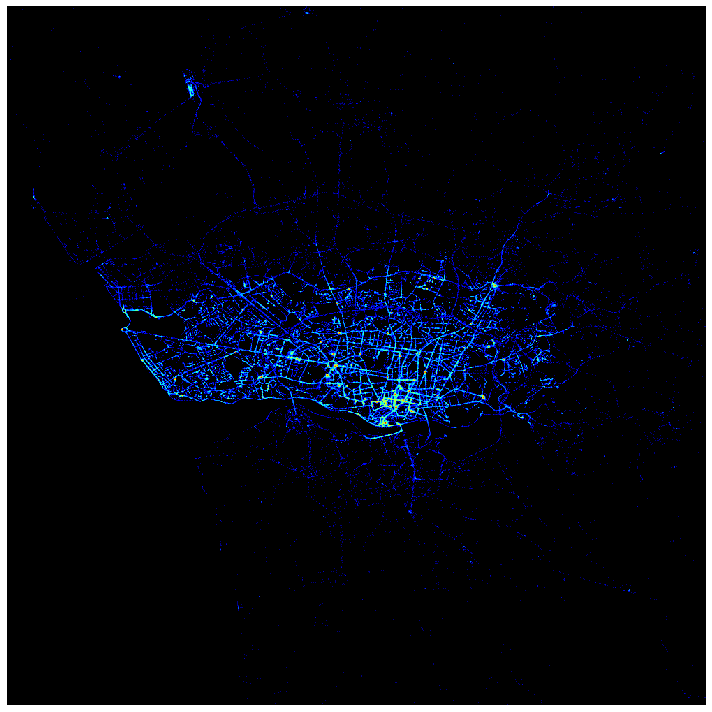

In [4]:
"""
HEATMAP:

This cell is used to configure and create the heatmap.
This implementation of the heatmap using matplotlib is based on: 
https://www.julienphalip.com/blog/drawing-geographical-density-maps-with-matplotlib/
https://www.kaggle.com/c/pkdd-15-predict-taxi-service-trajectory-i
"""

lat = np.asarray([x[0] for x in locations])
long = np.asarray([y[1] for y in locations])
radius = 0.1
bins = 1000

cmap = copy.copy(plt.cm.jet)
cmap.set_bad((0,0,0))  # Black background

# Center the map with the centroid
histogram_range = [
    [center[1] - radius, center[1] + radius],
    [center[0] - radius, center[0] + radius]
]

# Set figure size and create heatmap
fig = plt.figure(figsize=(10,10))
plt.hist2d(long, lat, bins=bins, norm=LogNorm(), cmap=cmap, range=histogram_range)

# Remove all axes and annotations to keep the map clean and simple
plt.grid(True)
plt.axis('off')
fig.axes[0].get_xaxis().set_visible(False)
fig.axes[0].get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()